# Sweep of $G$ and $B_e$ for Homog

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
from pprint import pprint
import re
# RegEx module

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [23]:
Regime = "LCycle"
SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\\" + Regime +"*Scorr*.csv") # LCycle
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_05\\" + Regime +"*Scorr*.csv") # FixedPt
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_06\\" + Regime +"*Scorr*.csv") # Hysteresis 

#SCorr_files = glob.glob(r"D:\Simulations\2020_11_10\\" + Regime +"*Scorr*.csv") # L Hysteresis 11_10 is faulty, use... 
#SCorr_files = glob.glob(r"D:\Simulations\2020_11_13\\" + Regime +"*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_12_26\\" + Regime +"*Scorr*.csv") # LCycle - 1.2e6
#SCorr_files = glob.glob(r"D:\Simulations\2021_02_03\\" + Regime +"*Scorr*.csv")

In [24]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("\[(.*)\].*\[(.*)\]",string)
    #x = re.findall("\[(.*)\].b_e(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G', 'B_e']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [25]:
df = df.sort_values(by=["FCFC"])
df

,G,B_e,SCFC,FCFC
591,0.,0.3,0.021555,-0.023584
590,0.,0.2,0.016703,-0.020834
595,0.,0.7,0.019055,-0.020654
589,0.,0.1,0.018332,-0.016618
592,0.,0.4,0.033259,-0.016037
...,...,...,...,...
253,0.4,0.6,0.535804,0.574213
254,0.4,0.7,0.551833,0.575119
224,0.45,0.8,0.525897,0.575623
351,0.65,1.1,0.426993,0.576720


In [34]:
df.tail(20)

,G,B_e,SCFC,FCFC
383,0.6,1.2,0.477783,0.563545
479,0.85,1.5,0.382786,0.563658
391,0.6,1.,0.440250,0.564220
189,0.3,0.4,0.579461,0.564326
318,0.5,0.9,0.497494,0.564438
286,0.55,0.8,0.448868,0.565797
252,0.4,0.5,0.519618,0.565898
222,0.45,0.6,0.495465,0.566478
289,0.55,1.1,0.500049,0.566548
159,0.35,0.5,0.558475,0.568002


Text(0.5, 1.0, 'FCFC against B_e sweeping G')

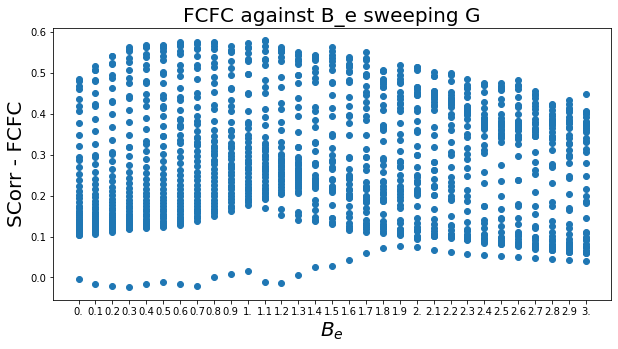

In [37]:
plt.scatter(df.sort_values(by=["B_e"]).B_e,df.sort_values(by=["B_e"]).FCFC)
plt.xlabel("$B_e$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.title("FCFC against B_e sweeping G", fontsize=20)

In [28]:
df.loc[df['FCFC'].idxmax()]

G            0.6
B_e          1.1
SCFC    0.459622
FCFC    0.580152
Name: 382, dtype: object

Text(0.5, 1.0, 'B_e = 1.1')

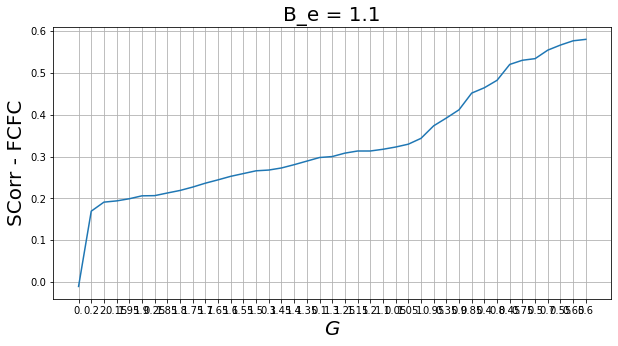

In [29]:
df_08 = df.loc[df['B_e'] == df.loc[df['FCFC'].idxmax()][1]]
plt.plot(df_08.G,df_08.FCFC)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.grid()
plt.title("B_e = "+ str(df.loc[df['FCFC'].idxmax()][1]), fontsize=20)

Text(0.5, 1.0, 'G = 0.6')

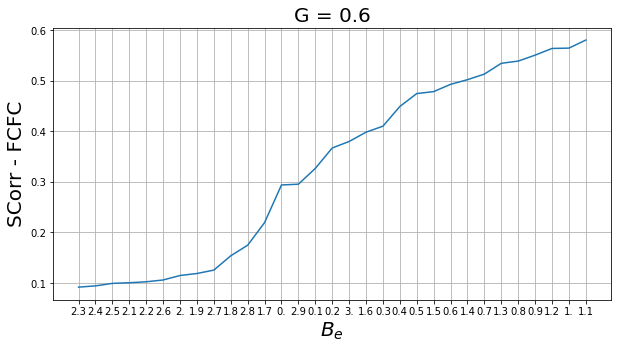

In [30]:
df_G = df.loc[df['G'] == df.loc[df['FCFC'].idxmax()][0]]
plt.plot(df_G.B_e,df_G.FCFC)
plt.xlabel("$B_e$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.grid()
plt.title("G = " + str(df.loc[df['FCFC'].idxmax()][0]), fontsize=20)

In [31]:
df_pivot = df.sort_values('FCFC').drop_duplicates(['G','B_e'],keep='last').pivot(index='B_e', columns='G', values='FCFC')
df_pivot
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

G,0.,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.
B_e,,,,,,,,,,,,,,,,,,,,,
0.,-0.003621,0.286519,0.418203,0.468389,0.485016,0.480670,0.460380,0.435624,0.407740,0.378623,...,0.127998,0.125282,0.122635,0.119584,0.116699,0.113378,0.110616,0.107707,0.104913,0.103635
0.1,-0.016618,0.295050,0.424466,0.481460,0.508110,0.516278,0.506154,0.479401,0.449623,0.418982,...,0.132961,0.130373,0.127186,0.124735,0.121450,0.118222,0.116012,0.113192,0.110310,0.107461
0.2,-0.020834,0.302837,0.429941,0.487805,0.522101,0.540591,0.541859,0.524258,0.495537,0.462962,...,0.138541,0.135480,0.132080,0.128899,0.126255,0.123491,0.120771,0.117922,0.115063,0.112040
0.3,-0.023584,0.318315,0.437531,0.486864,0.525521,0.552660,0.563358,0.557853,0.537217,0.508194,...,0.144956,0.140847,0.137275,0.133419,0.129657,0.127283,0.124698,0.122068,0.119872,0.117633
0.4,-0.016037,0.327160,0.434736,0.475720,0.519063,0.545177,0.564326,0.569123,0.561984,0.538901,...,0.155121,0.149821,0.144066,0.138436,0.134271,0.130905,0.127434,0.125393,0.122411,0.120562
0.5,-0.010862,0.346406,0.414948,0.439655,0.497614,0.540329,0.560298,0.568002,0.565898,0.552636,...,0.166655,0.161571,0.155202,0.149060,0.144281,0.139106,0.134193,0.129112,0.125536,0.122418
0.6,-0.015025,0.335636,0.372892,0.383954,0.439920,0.507899,0.552439,0.570950,0.574213,0.566478,...,0.180943,0.173837,0.167387,0.162231,0.155749,0.148881,0.144018,0.138559,0.133873,0.129063
0.7,-0.020654,0.331439,0.342846,0.324818,0.382771,0.441838,0.518838,0.558131,0.575119,0.570303,...,0.198129,0.189665,0.181616,0.174370,0.167157,0.161599,0.157013,0.150919,0.144944,0.138589
0.8,0.000350,0.315868,0.300804,0.285826,0.334334,0.422008,0.475829,0.523257,0.559140,0.575623,...,0.216131,0.207225,0.198257,0.190029,0.181725,0.174404,0.168263,0.161922,0.156366,0.151408


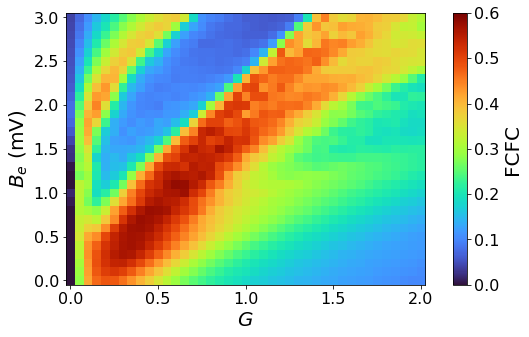

In [32]:
x = df_pivot.index[::5]
y = x.astype(np.float)
X = df_pivot.columns[::10]
Y = X.astype(np.float)

#ListedColormap(turbo_colormap_data) ,vmin=0,vmax=0.65
cs=plt.imshow(df_pivot, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',vmin=0,vmax=0.6,)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('FCFC', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
# plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')

plt.show()